# Clustering

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
from sklearn.cluster import KMeans
from temp_clustering import cluster_temp_diff
from settings import path_data, path_results
from plot_map import plot_map

In [2]:
ds_solar = xr.open_dataset(path_data / 'Solar_forcing_1st_mill.nc')
ds_volc = xr.open_dataset(path_data / 'Volc_Forc_AOD_1st_mill.nc')
ds_temp_r1 = xr.open_dataset(path_data / 'T2m_R1_ym_1stMill.nc')
ds_temp_r2 = xr.open_dataset(path_data / 'T2m_R2_ym_1stMill.nc')

In [3]:
n_clusters = 10
clusters_rel = cluster_temp_diff(ds_temp_r1, n_clusters)

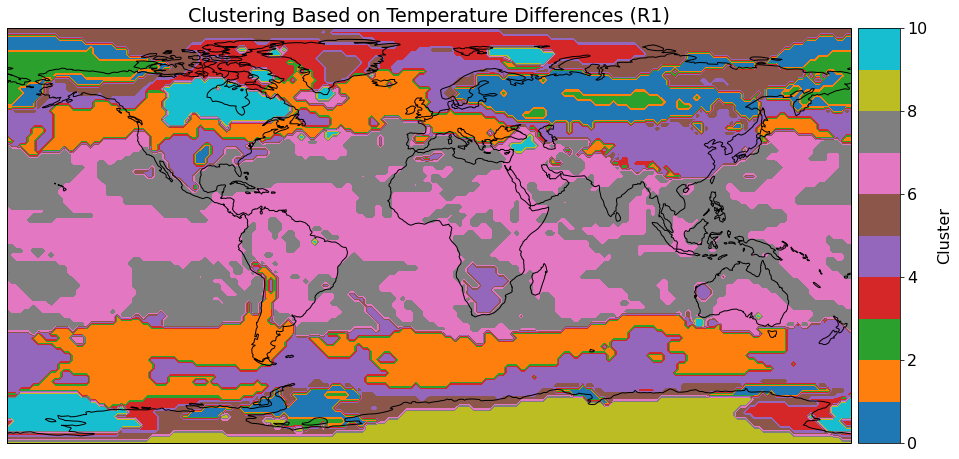

In [4]:
cmap = plt.cm.get_cmap('tab10', n_clusters)
fig = plot_map(clusters_rel+0.5, title='Clustering Based on Temperature Differences (R1)', colorbar_title='Cluster', cmap=cmap)
fig.savefig(path_results / 'map_cluster.png', dpi=300, bbox_inches='tight')
fig

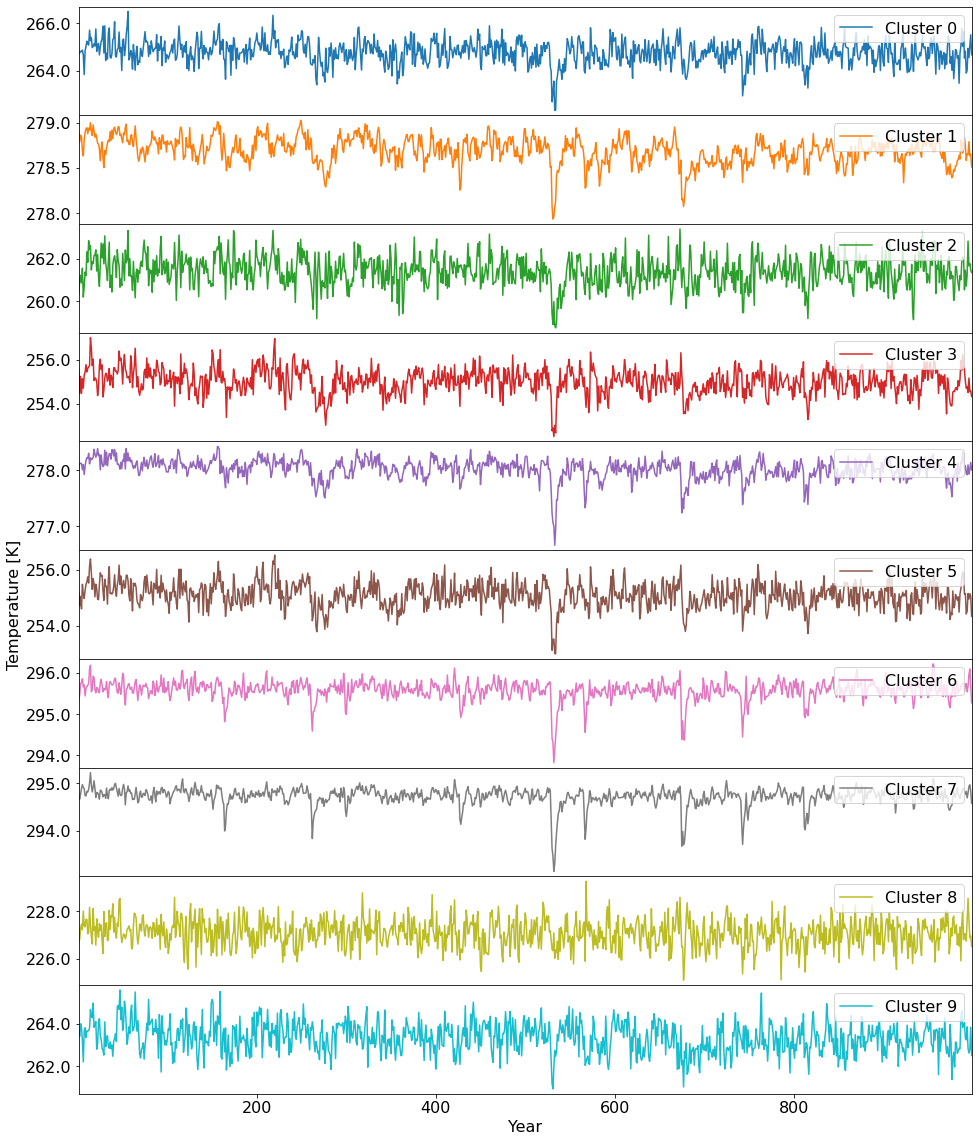

In [5]:
mean_temp_clusters = []
for c in np.unique(clusters_rel):
    temps_cluster = ds_temp_r1['T2m'].values[:, clusters_rel == c]
    temps_cluster = np.mean(temps_cluster, axis=1)
    mean_temp_clusters.append(temps_cluster)

fig, axes = plt.subplots(n_clusters, 1, figsize=(16, 20), sharex=True)
for i, ax in enumerate(axes.flatten()):
    ax.plot(np.arange(1, 1000), mean_temp_clusters[i], color=cmap((i+0.5) / n_clusters), label=f'Cluster {i}')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.legend(loc='upper right')
    
    if i == n_clusters - 1:
        ax.set_xlabel('Year')
    
    if i == n_clusters // 2:
        ax.set_ylabel('Temperature [K]')

plt.subplots_adjust(hspace=0)
fig.savefig(path_results / 'temp_course_cluster.png', dpi=300, bbox_inches='tight')